In [1]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
#%cd /content/drive/My-Drive/
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import math

Mounted at /content/gdrive/


In [2]:
raw = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/test8.csv')
raw

,Date,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2018-06-11,66.419998,62.356850,201.366592,139.268356,43.161572,35.760654,36.075409,29.904634,21.776939,91.941254
1,2018-06-12,68.554001,61.476101,204.039581,136.954926,42.667358,35.661705,39.682949,30.325052,21.423853,92.215569
2,2018-06-13,68.956001,62.444927,206.712601,138.805664,42.914463,35.008633,43.649250,29.952877,20.832191,91.884514
3,2018-06-14,71.543999,61.476101,201.812103,140.656418,42.667358,34.068604,48.014175,29.692720,20.994423,93.937096
4,2018-06-15,71.634003,61.476101,205.821594,142.969833,42.832092,33.504589,52.817585,29.118149,20.813103,93.643867
...,...,...,...,...,...,...,...,...,...,...,...
746,2021-04-26,738.200012,104.000000,610.000000,104.000000,54.200001,30.920000,349.000000,53.840000,27.290001,135.169998
747,2021-04-27,704.739990,106.000000,610.000000,103.500000,54.400002,31.129999,348.600006,54.119999,27.670000,135.149994
748,2021-04-28,694.400024,104.500000,602.000000,102.500000,54.799999,32.680000,367.029999,55.400002,27.709999,135.919998
749,2021-04-29,677.000000,106.000000,600.000000,103.500000,54.599998,31.950001,379.989990,56.290001,26.459999,138.179993


In [3]:
td = raw.iloc[200:,:].reset_index(drop=True) ###調成和底下天數一樣
tdd = td.copy()
tdd = tdd.iloc[:,1:]
td['Date'] = pd.to_datetime(td.Date, format = '%Y/%m/%d')
td

,Date,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2019-03-19,53.493999,86.014053,222.096069,109.715279,51.258083,36.908478,88.295052,27.267830,17.702547,80.231163
1,2019-03-20,54.720001,84.902992,223.481293,110.190239,51.696938,35.820026,86.869980,26.683519,17.227245,79.433357
2,2019-03-21,54.804001,84.902992,226.713470,109.240318,51.609165,36.859005,86.820160,26.829597,17.527943,80.615631
3,2019-03-22,52.905998,84.902992,229.483917,110.190239,52.048016,35.869499,86.282013,26.771166,16.102041,78.520233
4,2019-03-25,52.084000,83.699356,223.019547,107.340485,51.345856,35.315376,88.693687,25.758364,16.305742,77.933891
...,...,...,...,...,...,...,...,...,...,...,...
546,2021-04-26,738.200012,104.000000,610.000000,104.000000,54.200001,30.920000,349.000000,53.840000,27.290001,135.169998
547,2021-04-27,704.739990,106.000000,610.000000,103.500000,54.400002,31.129999,348.600006,54.119999,27.670000,135.149994
548,2021-04-28,694.400024,104.500000,602.000000,102.500000,54.799999,32.680000,367.029999,55.400002,27.709999,135.919998
549,2021-04-29,677.000000,106.000000,600.000000,103.500000,54.599998,31.950001,379.989990,56.290001,26.459999,138.179993


In [13]:
rrr= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/traindays=100/result2021-05-12 09:07:31.csv')
rrr

,Unnamed: 0,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0,286.31790,73.132690,236.03401,115.566010,39.543957,30.805227,219.34747,24.314190,16.465437,99.205130
1,1,286.32132,73.130210,236.01950,116.459490,39.486706,30.806133,219.34387,24.288130,16.332222,99.039604
2,2,286.33093,73.120735,235.99230,116.734110,39.382786,30.807568,219.38077,24.380196,16.397314,99.190780
3,3,286.33554,73.117180,236.00075,116.399180,39.325253,30.807490,219.24374,24.576970,16.296656,99.191250
4,4,286.33650,73.130020,236.01277,117.925545,39.269660,30.808176,219.21361,24.805610,16.042294,99.358390
...,...,...,...,...,...,...,...,...,...,...,...
644,644,641.24990,119.553460,601.02920,109.814440,53.321010,30.869081,316.43570,49.737938,21.405432,117.814480
645,645,637.42834,117.624170,597.57227,109.110750,53.505310,30.892986,322.47950,50.805600,21.335460,117.307060
646,646,641.81350,116.161290,597.09480,108.623270,53.604880,30.869892,321.57922,50.460330,21.366543,117.509940
647,647,644.68560,115.323680,597.18490,106.923400,53.532234,30.864250,321.76880,50.551254,21.706816,118.483505


In [14]:
#rdf.iloc[:,1]= td.pop('Date')
rdf = rrr.iloc[98:,:].reset_index(drop=True)
rdf.iloc[:,0]= td['Date']
rdf

,Unnamed: 0,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2019-03-19,286.31342,80.364560,236.06561,110.236820,51.554554,35.533302,220.10046,26.122343,17.473982,100.917810
1,2019-03-20,286.31190,81.628200,236.09625,110.048870,51.566048,38.094600,220.24344,25.836077,17.435860,100.940850
2,2019-03-21,286.31240,81.681885,236.10576,109.759580,51.669933,38.084854,220.06123,25.890882,17.323162,101.039300
3,2019-03-22,286.31018,81.003870,236.10530,110.036545,51.746025,37.505356,220.14044,25.881062,17.281374,101.039160
4,2019-03-25,286.30554,82.252920,236.14996,110.423965,51.815907,37.358433,220.17120,25.766802,17.326270,101.057980
...,...,...,...,...,...,...,...,...,...,...,...
546,2021-04-26,641.24990,119.553460,601.02920,109.814440,53.321010,30.869081,316.43570,49.737938,21.405432,117.814480
547,2021-04-27,637.42834,117.624170,597.57227,109.110750,53.505310,30.892986,322.47950,50.805600,21.335460,117.307060
548,2021-04-28,641.81350,116.161290,597.09480,108.623270,53.604880,30.869892,321.57922,50.460330,21.366543,117.509940
549,2021-04-29,644.68560,115.323680,597.18490,106.923400,53.532234,30.864250,321.76880,50.551254,21.706816,118.483505


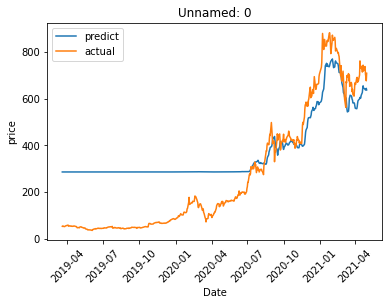

In [15]:
x= pd.to_datetime(td['Date'], format = '%Y/%m/%d')
y1= rdf['TSLA']
y2= td['TSLA']
plt.plot(x, y1, label= 'predict')
plt.plot(x, y2, label= 'actual')
plt.xlabel('Date')
plt.ylabel('price')
plt.xticks(rotation= 45)
plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

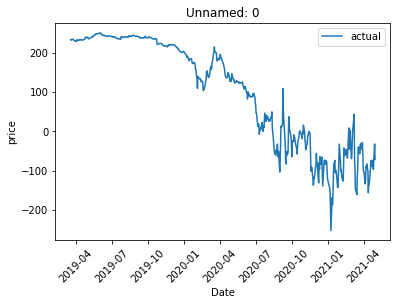

In [16]:
x= pd.to_datetime(td['Date'], format = '%Y/%m/%d')
y1= rdf['TSLA']
y2= td['TSLA']
#plt.plot(x, y1, label='predict')
#plt.plot(x, y2, label= 'actual')
plt.plot(x, y1-y2, label= 'actual')
plt.xlabel('Date')
plt.ylabel('price')
plt.xticks(rotation= 45)
plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [17]:
pre_df=rdf.iloc[:,1:] #刪掉時間行
pre_df

#rdf['Unnamed: 0'] = pd.to_datetime(rdf.Date, format = '%Y/%m/%d')
#rdf

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,286.31342,80.364560,236.06561,110.236820,51.554554,35.533302,220.10046,26.122343,17.473982,100.917810
1,286.31190,81.628200,236.09625,110.048870,51.566048,38.094600,220.24344,25.836077,17.435860,100.940850
2,286.31240,81.681885,236.10576,109.759580,51.669933,38.084854,220.06123,25.890882,17.323162,101.039300
3,286.31018,81.003870,236.10530,110.036545,51.746025,37.505356,220.14044,25.881062,17.281374,101.039160
4,286.30554,82.252920,236.14996,110.423965,51.815907,37.358433,220.17120,25.766802,17.326270,101.057980
...,...,...,...,...,...,...,...,...,...,...
546,641.24990,119.553460,601.02920,109.814440,53.321010,30.869081,316.43570,49.737938,21.405432,117.814480
547,637.42834,117.624170,597.57227,109.110750,53.505310,30.892986,322.47950,50.805600,21.335460,117.307060
548,641.81350,116.161290,597.09480,108.623270,53.604880,30.869892,321.57922,50.460330,21.366543,117.509940
549,644.68560,115.323680,597.18490,106.923400,53.532234,30.864250,321.76880,50.551254,21.706816,118.483505


In [18]:
rdf_log= np.log(pre_df) #取log
rdf_diffk= rdf_log.diff(1).dropna().reset_index(drop=True) #取差分
rdf_diff_e= np.exp(rdf_diffk)-1 #報酬率
rdf_diff_e

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,-0.000005,0.015724,0.000130,-0.001705,0.000223,0.072082,0.000650,-0.010959,-0.002182,0.000228
1,0.000002,0.000658,0.000040,-0.002629,0.002015,-0.000256,-0.000827,0.002121,-0.006464,0.000975
2,-0.000008,-0.008301,-0.000002,0.002523,0.001473,-0.015216,0.000360,-0.000379,-0.002412,-0.000001
3,-0.000016,0.015420,0.000189,0.003521,0.001350,-0.003917,0.000140,-0.004415,0.002598,0.000186
4,-0.000005,0.018751,0.000095,-0.005498,0.001902,-0.017689,-0.000360,-0.003363,-0.000203,-0.000491
...,...,...,...,...,...,...,...,...,...,...
545,-0.005633,-0.007986,-0.007425,-0.005880,0.005954,0.000287,0.010783,0.003945,-0.002262,-0.001784
546,-0.005960,-0.016137,-0.005752,-0.006408,0.003456,0.000774,0.019100,0.021466,-0.003269,-0.004307
547,0.006879,-0.012437,-0.000799,-0.004468,0.001861,-0.000748,-0.002792,-0.006796,0.001457,0.001729
548,0.004475,-0.007211,0.000151,-0.015649,-0.001355,-0.000183,0.000590,0.001802,0.015926,0.008285


In [19]:
stock_num=pre_df.shape[1]
inv_days=pre_df.shape[0]-1
print(stock_num,inv_days)

10 550


In [20]:
#將預測報酬率為負的改為0(因為後續要變成權重)
rdf_return_po=rdf_diff_e.copy()
for i in range(stock_num):
  for j in range(inv_days):
    if (rdf_return_po.iloc[j, i] < 0):
      rdf_return_po.iloc[j, i]=0
rdf_return_po

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.000000,0.015724,0.000130,0.000000,0.000223,0.072082,0.000650,0.000000,0.000000,0.000228
1,0.000002,0.000658,0.000040,0.000000,0.002015,0.000000,0.000000,0.002121,0.000000,0.000975
2,0.000000,0.000000,0.000000,0.002523,0.001473,0.000000,0.000360,0.000000,0.000000,0.000000
3,0.000000,0.015420,0.000189,0.003521,0.001350,0.000000,0.000140,0.000000,0.002598,0.000186
4,0.000000,0.018751,0.000095,0.000000,0.001902,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
545,0.000000,0.000000,0.000000,0.000000,0.005954,0.000287,0.010783,0.003945,0.000000,0.000000
546,0.000000,0.000000,0.000000,0.000000,0.003456,0.000774,0.019100,0.021466,0.000000,0.000000
547,0.006879,0.000000,0.000000,0.000000,0.001861,0.000000,0.000000,0.000000,0.001457,0.001729
548,0.004475,0.000000,0.000151,0.000000,0.000000,0.000000,0.000590,0.001802,0.015926,0.008285


In [21]:
rdf_return_po.sum(axis=1)

0      0.089036
1      0.005811
2      0.004356
3      0.023404
4      0.020748
         ...   
545    0.020969
546    0.044796
547    0.011927
548    0.031228
549    0.023085
Length: 550, dtype: float64

In [22]:
rdf_diff=rdf_diff_e.copy()
pro_rdf_diff= pd.DataFrame(columns= rdf_diff.columns, index=rdf_diff.index)
pro_rdf_diff

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
for i in range(inv_days):
  for j in range(stock_num):
    np.seterr(invalid='ignore')
    pro_rdf_diff.iloc[i,j]= rdf_return_po.iloc[i,j] / rdf_return_po.sum(axis=1)[i]

pro_rdf_diff.fillna(value=0)
pro_rdf_diff #投資權重

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0,0.176601,0.00145777,0,0.00250402,0.809577,0.00729605,0,0,0.00256418
1,0.00030053,0.11318,0.00693185,0,0.346694,0,0,0.365049,0,0.167844
2,0,0,0,0.579291,0.338077,0,0.0826325,0,0,0
3,0,0.658845,0.00808206,0.150437,0.0577029,0,0.0059703,0,0.111004,0.00795865
4,0,0.903758,0.00457583,0,0.0916657,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
545,0,0,0,0,0.283957,0.0136731,0.514232,0.188138,0,0
546,0,0,0,0,0.0771589,0.0172872,0.426367,0.479187,0,0
547,0.576809,0,0,0,0.156031,0,0,0,0.122152,0.145008
548,0.143301,0,0.00483215,0,0,0,0.0188783,0.0577016,0.509979,0.265308


In [24]:
pro_rdf_diff.sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
Length: 550, dtype: float64

In [25]:
tdd_log= np.log(tdd)
tdd_diff= tdd_log.diff(1).dropna().reset_index(drop=True)
tdd_diff_e= np.exp(tdd_diff)-1
tdd_diff_e #真實報酬率

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.022918,-0.012917,0.006237,0.004329,0.008562,-0.029491,-0.016140,-0.021429,-0.026849,-0.009944
1,0.001535,0.000000,0.014463,-0.008621,-0.001698,0.029006,-0.000574,0.005474,0.017455,0.014884
2,-0.034633,0.000000,0.012220,0.008696,0.008503,-0.026846,-0.006198,-0.002178,-0.081350,-0.025992
3,-0.015537,-0.014177,-0.028169,-0.025862,-0.013491,-0.015448,0.027951,-0.037832,0.012651,-0.007467
4,0.028224,0.017699,0.010352,0.000000,-0.037607,-0.100028,-0.041573,-0.019660,0.013087,0.014677
...,...,...,...,...,...,...,...,...,...,...
545,0.012065,0.000000,0.013289,0.000000,0.011194,-0.006107,-0.060565,0.023574,-0.014801,0.003340
546,-0.045326,0.019231,0.000000,-0.004808,0.003690,0.006792,-0.001146,0.005201,0.013924,-0.000148
547,-0.014672,-0.014151,-0.013115,-0.009662,0.007353,0.049791,0.052869,0.023651,0.001446,0.005697
548,-0.025058,0.014354,-0.003322,0.009756,-0.003650,-0.022338,0.035310,0.016065,-0.045110,0.016627


In [26]:
pro_rdf_diff.shape

(550, 10)

In [27]:
tdd_diff_e.shape

(550, 10)

In [28]:
profit= []
for i in range(inv_days):
    if i == 0:
        temp_profit= 1
    else:
        temp_profit=profit[-1]
    for j in range(stock_num):
        a = pro_rdf_diff.iloc[i,j] #投資權重
        b = tdd_diff_e.iloc[i,j] #真實報酬率
        temp_profit = temp_profit + (a * b)
    if (np.isnan(temp_profit) == True):
        temp_profit = profit[-1]
    profit.append(temp_profit)
print(profit)

[0.973731208251968, 0.9777399148212238, 0.9851398442562622, 0.9724146417590258, 0.9850105027747557, 0.9968685144244237, 0.9908490709491723, 1.0132289861113717, 1.012256555544028, 1.013402090710811, 1.019232618651281, 1.0307893063626843, 1.0297449946196007, 1.0732177675712746, 1.066194074427188, 1.0707269205582768, 1.0738934870931907, 1.1191325129583134, 1.124468754829968, 1.1241806147961435, 1.1563227255063033, 1.1352554314046568, 1.1386854775855508, 1.155716461333467, 1.1483788686270402, 1.1484937394912178, 1.161674890368044, 1.1349392661791142, 1.1285130297786032, 1.1378292297367512, 1.128595783591913, 1.129454402921697, 1.143842262043852, 1.137541027398111, 1.119485917632835, 1.1136816874651319, 1.1002236418960043, 1.09823040623622, 1.065554310441585, 1.065554310441585, 1.0885641330066682, 1.1103033300844243, 1.1103033300844243, 1.1031474841971856, 1.1017960759774161, 1.0799999273805896, 1.0640097698784765, 1.0552781277801722, 1.05604918411471, 1.064030552401515, 1.0645872149983941,

In [29]:
pdf= pd.DataFrame(profit, columns=['p'])
pdf #利潤

,p
0,0.973731
1,0.977740
2,0.985140
3,0.972415
4,0.985011
...,...
545,1.919070
546,1.921476
547,1.915163
548,1.894556


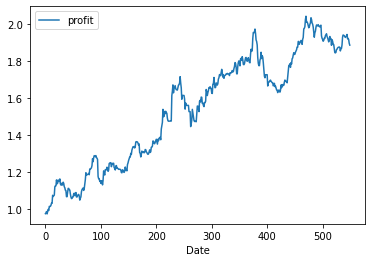

In [30]:
x= pdf.index
y1= pdf['p']
plt.plot(x, y1, label='profit')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [31]:
return_m = []
return_m.extend(profit)
for i in range(len(return_m)):
    return_m[i] = return_m[i] - 1
# print(return_m) #報酬率

In [32]:
pdf= pd.DataFrame(return_m, columns=['p'])
pdf #報酬率

,p
0,-0.026269
1,-0.022260
2,-0.014860
3,-0.027585
4,-0.014989
...,...
545,0.919070
546,0.921476
547,0.915163
548,0.894556


In [ ]:
# pdf.to_csv('td=100_1.csv', index=False)

In [33]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/報酬率')
print(os.getcwd())#获取当前工作路径

outstr= 'td=100_551'+ '.csv'
pdf.to_csv(outstr) #相对位置，保存在getwcd()获得的路径下
outstr

/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/報酬率


'td=100_551.csv'

In [34]:
pdf_return = pd.DataFrame(return_m, columns=['p'])
pdf_return
np.var(pdf_return)

p    0.090227
dtype: float64

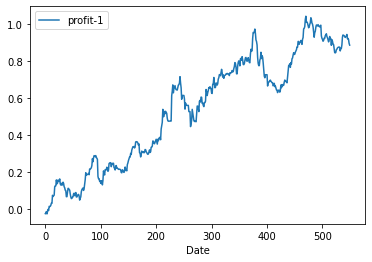

In [35]:
x= pdf_return.index
y1= pdf['p']
plt.plot(x, y1, label='profit-1')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [36]:
pdf1= pdf

for i in range(inv_days-1):
  n= i+1
  pdf1.iloc[i,0]=  pdf1.iloc[i-1,0]* pdf.iloc[i,0]

pdf1

,p
0,-2.324569e-02
1,5.174509e-04
2,-7.689401e-06
3,2.121149e-07
4,-3.179496e-09
...,...
545,-4.272013e-211
546,-3.936557e-211
547,-3.602591e-211
548,-3.222719e-211


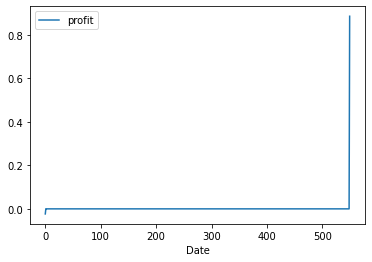

In [37]:
x= pdf1.index
y1= pdf1['p']
plt.plot(x, y1, label='profit')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()